# Анализ рекламной кампании приложения Procrastinate Pro+

*Procrastinate Pro+* - развлекательное приложение. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

Задача изучить:
1. Откуда приходят пользователи и какими устройствами они пользуются?
2. Сколько стоит привлечение пользователей из различных рекламных каналов?
3. Сколько денег приносит каждый клиент?
4. Когда расходы на привлечение клиента окупаются?
5. Какие факторы мешают привлечению клиентов?


Для анализа предоставлены три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.



Структура `visits_info_short.csv`:

`User Id` — уникальный идентификатор пользователя,

`Region` — страна пользователя,

`Device` — тип устройства пользователя,

`Channel` — идентификатор источника перехода,

`Session Start` — дата и время начала сессии,

`Session End` — дата и время окончания сессии.


Структура `orders_info_short.csv`:

`User Id` — уникальный идентификатор пользователя,

`Event Dt` — дата и время покупки,

`Revenue` — сумма заказа.


Структура `costs_info_short.csv`:
`dt` — дата проведения рекламной кампании,

`Channel` — идентификатор рекламного источника,

`costs` — расходы на эту кампанию.

**План исследования**:

1. Изучение данных.

2. Предобработка данных:

* Замена названий столбцов;

* Проверка данных на дубликаты;

* Преобразование данных в нужные типы;

* Проверка данных на наличие пропусков.

3. Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии.

4. Исследовательский анализ данных.
* Составление профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей.

* Определение из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

* Определение какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 

* Изучение рекламных источников привлечения и определение каналов, из которых пришло больше всего платящих пользователей. 

5. Оценка расходов на маркетинг.
6. Оценка окупаемости рекламы. Визуализация и описание информации о(об):
* Окупаемости рекламы в целом.
* Конверсии пользователей и динамики её изменения, а также информации о качестве удержания пользователей. 
* Окупаемости рекламы с разбивкой по устройствам. 
* Окупаемости рекламы с разбивкой по странам. 
* Окупаемости рекламы с разбивкой по рекламным каналам. 

7. Общий вывод.

### Загрузка данных и их предобработка

In [1]:
#загружаем все необходимые библиотки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#открываем файлы и записываем их в соответствующие переменные
visits, orders, costs = (
    pd.read_csv('C:\\Users\\nadya\\OneDrive\\Desktop\\yandex_practicum\\analysis_of_ad_campaign\\visits_info_short.csv'),
    pd.read_csv('C:\\Users\\nadya\\OneDrive\\Desktop\\yandex_practicum\\analysis_of_ad_campaign\\orders_info_short.csv'),
    pd.read_csv('C:\\Users\\nadya\\OneDrive\\Desktop\\yandex_practicum\\analysis_of_ad_campaign\\costs_info_short.csv'),
)

In [3]:
#напишем функцию, с помощью которой выведем основную информацию о файлах
def data_inf(df):
    print(f'Первые строки таблицы:')
    print('*'*20)
    display(df.head())
    print(f'Информация о таблице:')
    print('*'*20)
    df.info()
    print(f'Наиболее часто встречающиеся строки:')
    print('*'*20)
    for name, values in df.iteritems():
        print(values.value_counts)

In [4]:
#применим функцию ко всем датафреймам
data_inf(visits)
data_inf(orders)
data_inf(costs)

Первые строки таблицы:
********************


User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

Информация о таблице:
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
Наиболее часто встречающиеся строки:
********************
<bound method IndexOpsMixin.value_counts of 0         981449118918
1         278965908054
2         590706206550
3         326433527971
4         349773784594
              ...     
309896    329994900775
309897    334903592310
309898    540102010126
309899    308736936846
309900    109329042535
Name: User Id, Length: 309901, dtype: int64>
<bound method IndexOpsMixin.value_counts of 

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

Информация о таблице:
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
Наиболее часто встречающиеся строки:
********************
<bound method IndexOpsMixin.value_counts of 0        188246423999
1        174361394180
2        529610067795
3        319939546352
4        366000285810
             ...     
40207    651604369137
40208    275341387049
40209    374656616484
40210    168548862926
40211    329994900775
Name: User Id, Length: 40212, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0        2019-05-01 23:09:52
1        2019-05-01 12:24:04
2        2019-05-01 11:34:04
3        2019-05-01 15:34:40
4        2019-05-01 13:59:51
             

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

Информация о таблице:
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
Наиболее часто встречающиеся строки:
********************
<bound method IndexOpsMixin.value_counts of 0       2019-05-01
1       2019-05-02
2       2019-05-03
3       2019-05-04
4       2019-05-05
           ...    
1795    2019-10-23
1796    2019-10-24
1797    2019-10-25
1798    2019-10-26
1799    2019-10-27
Name: dt, Length: 1800, dtype: object>
<bound method IndexOpsMixin.value_counts of 0             FaceBoom
1             FaceBoom
2             FaceBoom
3             FaceBoom
4             FaceBoom
             ...      
1795    lambdaMediaAds
1796    lambdaMediaAds
1797    lambdaMediaAds
1798   

Названия столбцов visits, orders и costs обозначены неверно, необходимо привести их к нужному виду. Пропусков нет во всех датафреймах. Тип данных `Session Start`, `Session End`, `Event Dt` и `dt` указан неверно, должно быть datetime, поскольку в них содержится информация о дате и времени мероприятия.

Сделаем предобработку данных.

In [5]:
#приведем столбцы visits, orders и costs к нижнему регистру
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns]

In [6]:
#выведем столбцы всех датафреймов
visits.columns, orders.columns, costs.columns

(Index(['user_id', 'region', 'device', 'channel', 'session_start',
        'session_end'],
       dtype='object'),
 Index(['user_id', 'event_dt', 'revenue'], dtype='object'),
 Index(['dt', 'channel', 'costs'], dtype='object'))

In [7]:
#приведем типы данных к нужному виду в тех столбцах, где это необходимо
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [8]:
#посчитаем кол-во дубликатов в каждом датафрейме
visits.duplicated().sum()
orders.duplicated().sum()
costs.duplicated().sum()

0

In [9]:
#выведем информацию о датафреймах еще раз, чтобы проверить удалось ли
#привести названия столбцов к нужному виду и заменить тип данных там, где это было нужно
visits.info()
costs.info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212

Названия столбцов приведены к нужному виду. Типы данных изменены там, где это было необходимо. Пропусков нет, дубликатов также нет. Данные можно анализировать.

### Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии

In [10]:
#функция для создания пользовательских профилей

def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )


    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [11]:
#функция для расчёта удержания

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [12]:
#функция для расчёта конверсии

def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [13]:
#функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )


In [14]:
#функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df


In [15]:
#функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()


In [16]:
#функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [17]:
#функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

In [18]:
#составим профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt               month  payer  acquisition_cost  
0  2019-05-07 2019-05-07 20:58:57   True          1.088172  
1  2019-07-09 2019-07-09 12:46:07  False          1.107237  
2  2019-10-01 2019-10-01 09:58:33  False          0.000000  
3  2019-08-22 2019-08-22 21:35:48  False          0.988235  
4  2019-10-02 2019-10-02 00:07:44  False          0.230769

In [19]:
#зададим момент анализа в соответсвии с условиями проекта
observation_date = datetime(2019, 11, 1).date()

#зададим горизонт в 14 дней
horizon_days = 14

#определим минимальную и максимальную даты привлечения пользователей
min_analysis_date = profiles['dt'].min()
max_analysis_date = observation_date - timedelta(days = horizon_days - 1)

print(f'Минимальная дата привлечения пользователей: {min_analysis_date}')
print(f'Максимальная дата привлечения пользователей: {max_analysis_date}')

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-19


Профили удалось создать. В задании проекта указано, что есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года, однако было обнаружено для корректного анализа нам понадобятся данные о пользователях, привлеченных с 1 мая 2019 года по 19 октрября 2019 года. 

**Момент анализа** - 1 ноября 2019 года. 

**Горизонт** - 14 дней.

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [20]:
profiles.groupby('region').agg({'user_id':'nunique', 'payer':['sum','mean']})

user_id payer          
              nunique   sum      mean
region                               
France          17450   663  0.037994
Germany         14981   616  0.041119
UK              17575   700  0.039829
United States  100002  6902  0.069019

В приложение приходят пользователи из Франции, Германии, Великобритании и США. Больше всего платящих пользователей приходится на США (0.07). На втором месте стоит Германия (0.04), на третьем - Великобритания (0.039), на последнем - Франция (0.038).

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [21]:
profiles.groupby('device').agg({'user_id':'nunique', 'payer':['sum','mean']})

user_id payer          
        nunique   sum      mean
device                         
Android   35032  2050  0.058518
Mac       30042  1912  0.063644
PC        30455  1537  0.050468
iPhone    54479  3382  0.062079

Клиенты приложения пользуются Android, Mac, PC и iPhone. 

Предпочтения пользователей в девайсах:

1. Mac (6.3%).

2. iPhone (6.2%)

3. Android (5.8%).

4. PC (5%).

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [22]:
channel_ratio = profiles.groupby('channel').agg({'user_id':'nunique', 'payer':['sum','mean']})

#уберем мультииндекс
channel_ratio.columns = channel_ratio.columns.droplevel(0)
#отсортируем таблицу по столбцу mean
channel_ratio.sort_values(by='mean', ascending=False)

nunique   sum      mean
channel                                    
FaceBoom              29144  3557  0.122049
AdNonSense             3880   440  0.113402
lambdaMediaAds         2149   225  0.104700
TipTop                19561  1878  0.096007
RocketSuperAds         4448   352  0.079137
WahooNetBanner         8553   453  0.052964
YRabbit                4312   165  0.038265
MediaTornado           4364   156  0.035747
LeapBob                8553   262  0.030633
OppleCreativeMedia     8605   233  0.027077
organic               56439  1160  0.020553

Больше всего платящих пользователей пришло из FaceBoom. На втором месте стоит AdNonSense, а на третьем lambdaMediaAds. Наоборот, меньше всего пользователей пришло по каналу LeapBob, OppleCreativeMedia и органическому трафику.

### Оценка расходов на маркетинг

Для начала посчитаем общую сумму расходов на маркетинг. 

In [23]:
sum_ad = round(costs['costs'].sum(), 1)
sum_ad

105497.3

Общая сумма расходов на маркетинг составила 105497.3

Выясним, как траты распределены по рекламным источникам, то есть сколько денег было вложено в каждый источник привлечения пользователей.

In [24]:
costs_grouped = costs.groupby('channel').agg({'costs': 'sum'})
costs_grouped.sort_values(by='costs', ascending=False)

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

Больше всего было вложено в рекламу на канале TipTop, хотя предыдущие расчеты показали, что по кол-ву пришедших в итоге платящих пользователей этот источник стоит на четвертом месте. На втором месте по расходам стоит канал FaceBoom. Минимальные расходы были на маркетинг на MediaTornado и YRabbit.

Построим теперь график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.

In [25]:
#создадим столбцы с номером недели и месяца
costs['dt'] = pd.to_datetime(costs['dt'])

costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
costs.head()

dt   channel  costs  week  month
0 2019-05-01  FaceBoom  113.3    18      5
1 2019-05-02  FaceBoom   78.1    18      5
2 2019-05-03  FaceBoom   85.8    18      5
3 2019-05-04  FaceBoom  136.4    18      5
4 2019-05-05  FaceBoom  122.1    18      5

In [26]:
#сгруппируем данные по неделям и посчитаем сумму расходов на маркетинг за каждую неделю
week_cost = costs.groupby('week').agg({'costs': 'sum'})
week_cost

costs
week          
18    1455.640
19    2031.820
20    1976.320
21    2297.120
22    3427.075
23    2915.740
24    2706.390
25    3421.390
26    4837.120
27    4660.335
28    3516.835
29    3039.780
30    3445.460
31    4609.530
32    4446.835
33    4703.960
34    4670.370
35    4732.160
36    4280.635
37    4227.870
38    5473.535
39    6784.580
40    6365.370
41    5190.355
42    4679.935
43    5601.140

In [27]:
#сгруппируем данные по месяцам и посчитаем сумму расходов на маркетинг за каждый месяц
month_cost = costs.groupby('month').agg({'costs': 'sum'})
month_cost

costs
month           
5       9978.570
6      15090.045
7      16447.060
8      20657.870
9      22441.340
10     20882.415

Text(0, 0.5, 'Расходы')

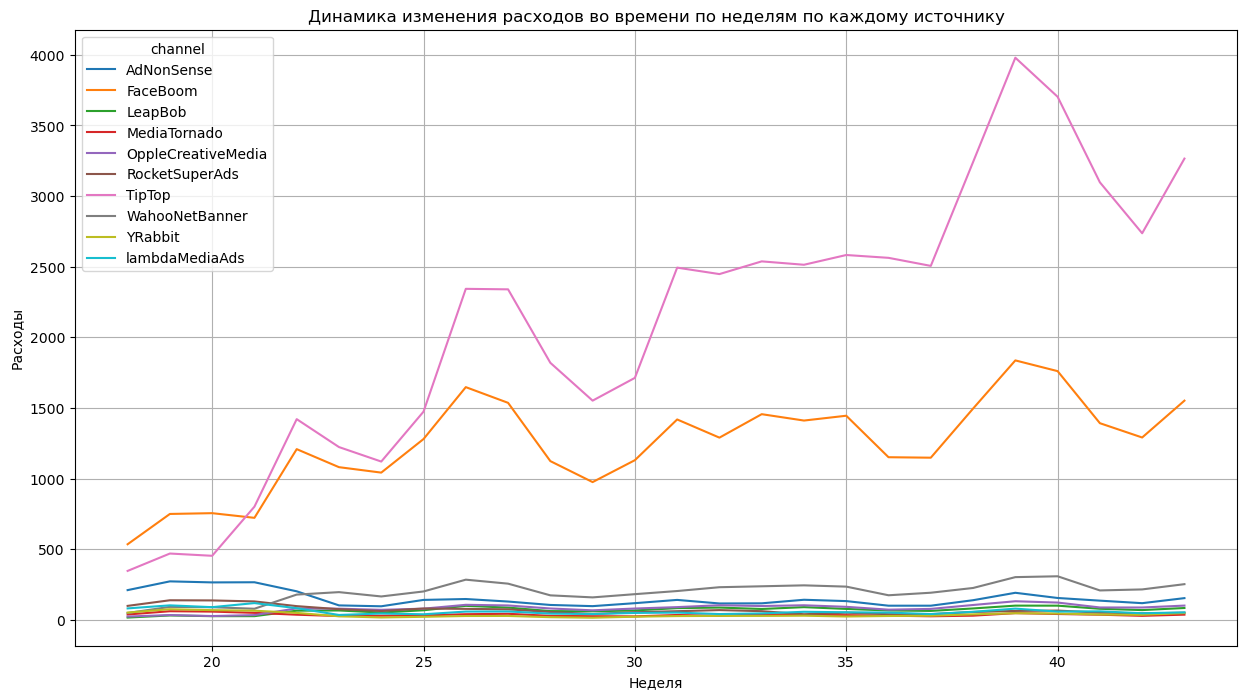

In [28]:
#создадим сводную таблицу, в которой будут посчитаны расходы на маркетинг по неделям, и построим график
costs.pivot_table(
    index='week', 
    columns='channel', 
    values='costs', 
    aggfunc='sum'
).plot(figsize=(15, 8), grid=True)

plt.title('Динамика изменения расходов во времени по неделям по каждому источнику')
plt.xlabel('Неделя')
plt.ylabel('Расходы')

Судя по графику:
* самые большие расходы на маркетинг по неделям приходятся на каналы FaceBoom и TipTop;
* еженедельные расходы на остальные каналы привлечения пользователей примерно одинаковы.

Text(0, 0.5, 'Расходы')

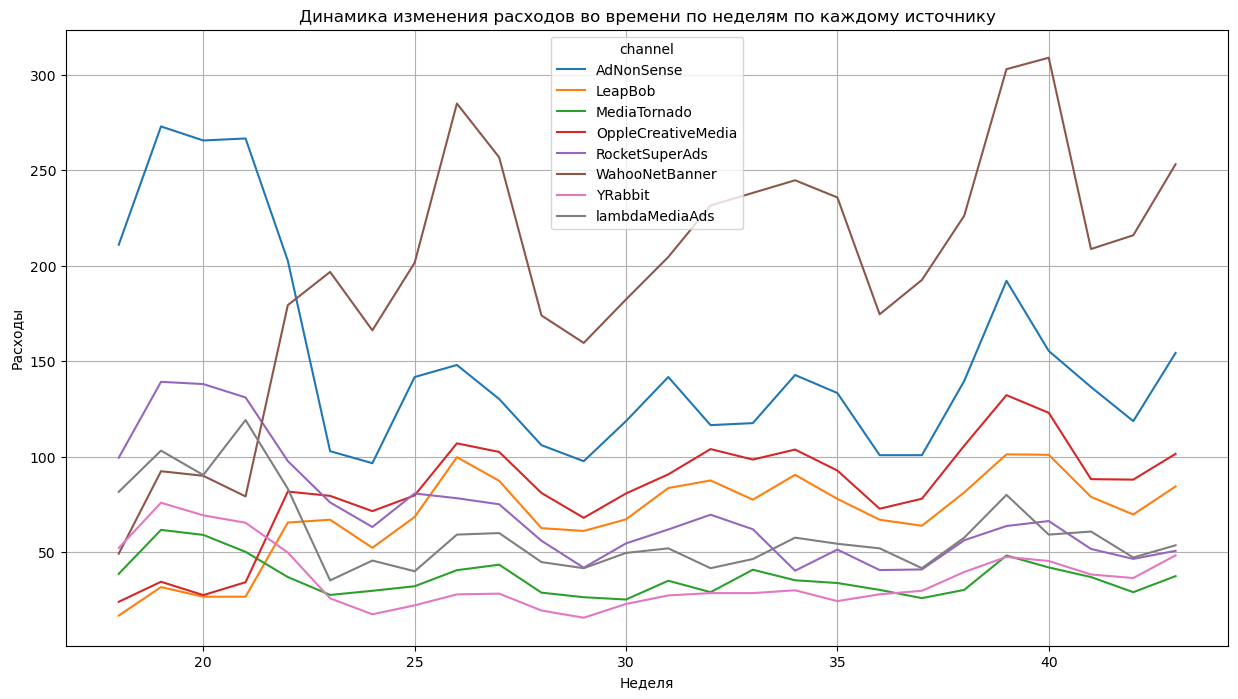

In [29]:
#создадим срез данных, исключив TipTop и FaceBoom, чтобы посмотреть как распределяется бюджет в других каналах
costs_filter = costs.query('channel not in ["TipTop", "FaceBoom"]')
costs_filter.pivot_table(
    index='week', 
    columns='channel', 
    values='costs', 
    aggfunc='sum'
).plot(figsize=(15, 8), grid=True)

plt.title('Динамика изменения расходов во времени по неделям по каждому источнику')
plt.xlabel('Неделя')
plt.ylabel('Расходы')

Помимо FaceBoom и TipTop можно выделить еще 2 самых дорогостоящих канала привлечения: WahooNetBanner и AdNonSense. 

Text(0, 0.5, 'Расходы')

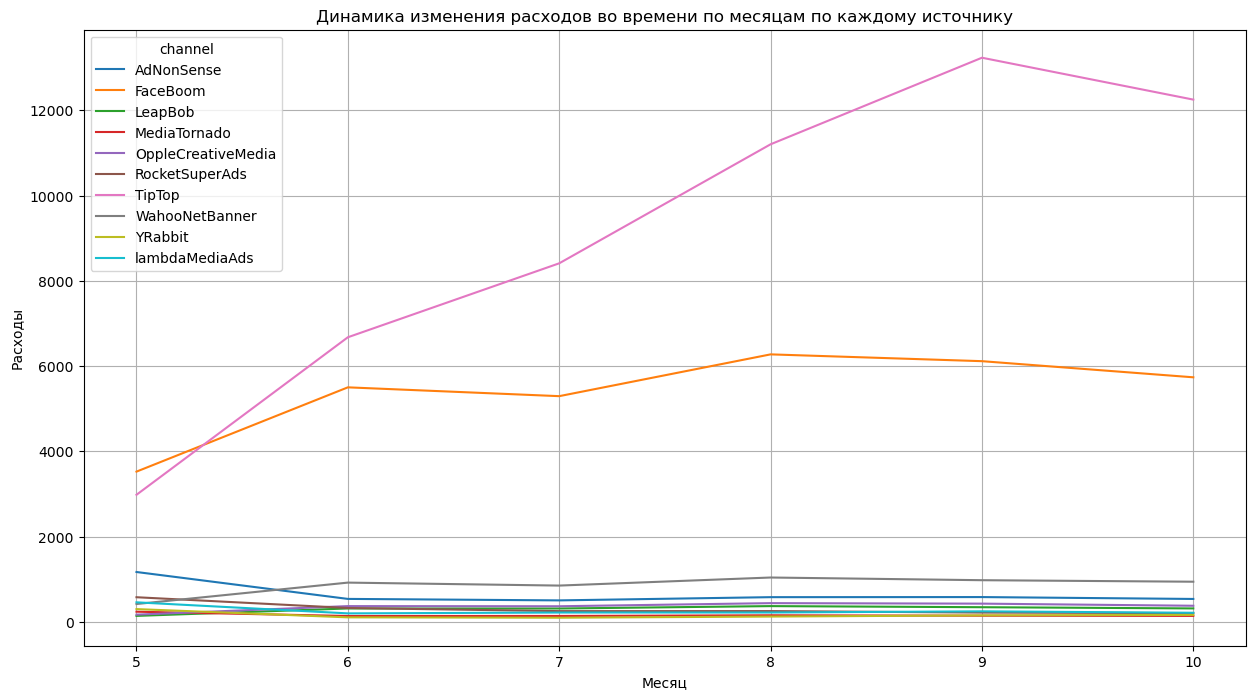

In [30]:
#создадим сводную таблицу, в которой будут посчитаны расходы на маркетинг по месяцам, и построим график
costs.pivot_table(
    index='month', 
    columns='channel', 
    values='costs', 
    aggfunc='sum'
).plot(figsize=(15, 8), grid=True)

plt.title('Динамика изменения расходов во времени по месяцам по каждому источнику')
plt.xlabel('Месяц')
plt.ylabel('Расходы')

Судя по графику:
* самые большие расходы на маркетинг по месяцам приходятся на каналы FaceBoom и TipTop;
* ежемесячные расходы на остальные каналы привлечения пользователей примерно одинаковы.

Создадим срез данных, исключив FaceBoom и TipTop, чтобы посмотреть как распределяется бюджет в других каналах. Построим также график по полученному срезу.

Text(0, 0.5, 'Расходы')

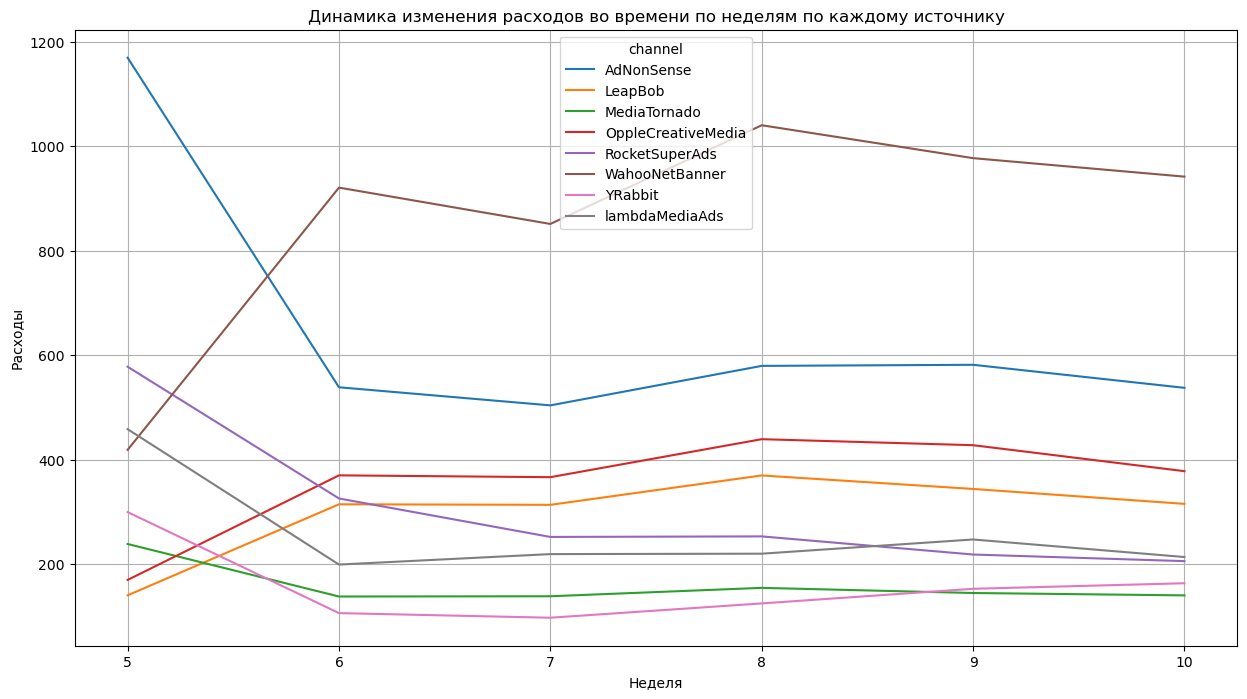

In [31]:
costs_filter = costs.query('channel not in ["TipTop", "FaceBoom"]')
costs_filter.pivot_table(
    index='month', 
    columns='channel', 
    values='costs', 
    aggfunc='sum'
).plot(figsize=(15, 8), grid=True)

plt.title('Динамика изменения расходов во времени по неделям по каждому источнику')
plt.xlabel('Неделя')
plt.ylabel('Расходы')

Как и в предыдущем выводе по графику динамики расходов по неделям, помимо FaceBoom и TipTop здесь также можно выделить еще 2 самых дорогостоящих канала привлечения: WahooNetBanner и AdNonSense. 

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

In [32]:
#считаем LTV и ROI с разбивкой по каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

#сохраняем в переменную сас соответсвующий столбец из roi_grouped
cac = roi_grouped['cac'].sort_values(ascending=False)
round(cac, 2)

channel
TipTop                2.76
FaceBoom              1.11
AdNonSense            1.01
lambdaMediaAds        0.73
WahooNetBanner        0.60
RocketSuperAds        0.42
OppleCreativeMedia    0.25
MediaTornado          0.22
YRabbit               0.22
LeapBob               0.21
Name: cac, dtype: float64

Топ-3 самых больших затрат на привлечение 1 пользователя из источников:
1. TipTop (2.76);
2. FaceBoom (1.11);
3. AdNonSense (1.01).

Самыми малозатратными каналами оказались: MediaTornado, YRabbit, LeapBob.

### Оценка окупаемости рекламы

Проанализируем общую окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

In [33]:
#для начала напишем срез, исключив органический трафик для более точного анализа окупаемости рекламы
profiles = profiles.query('channel != "organic"')

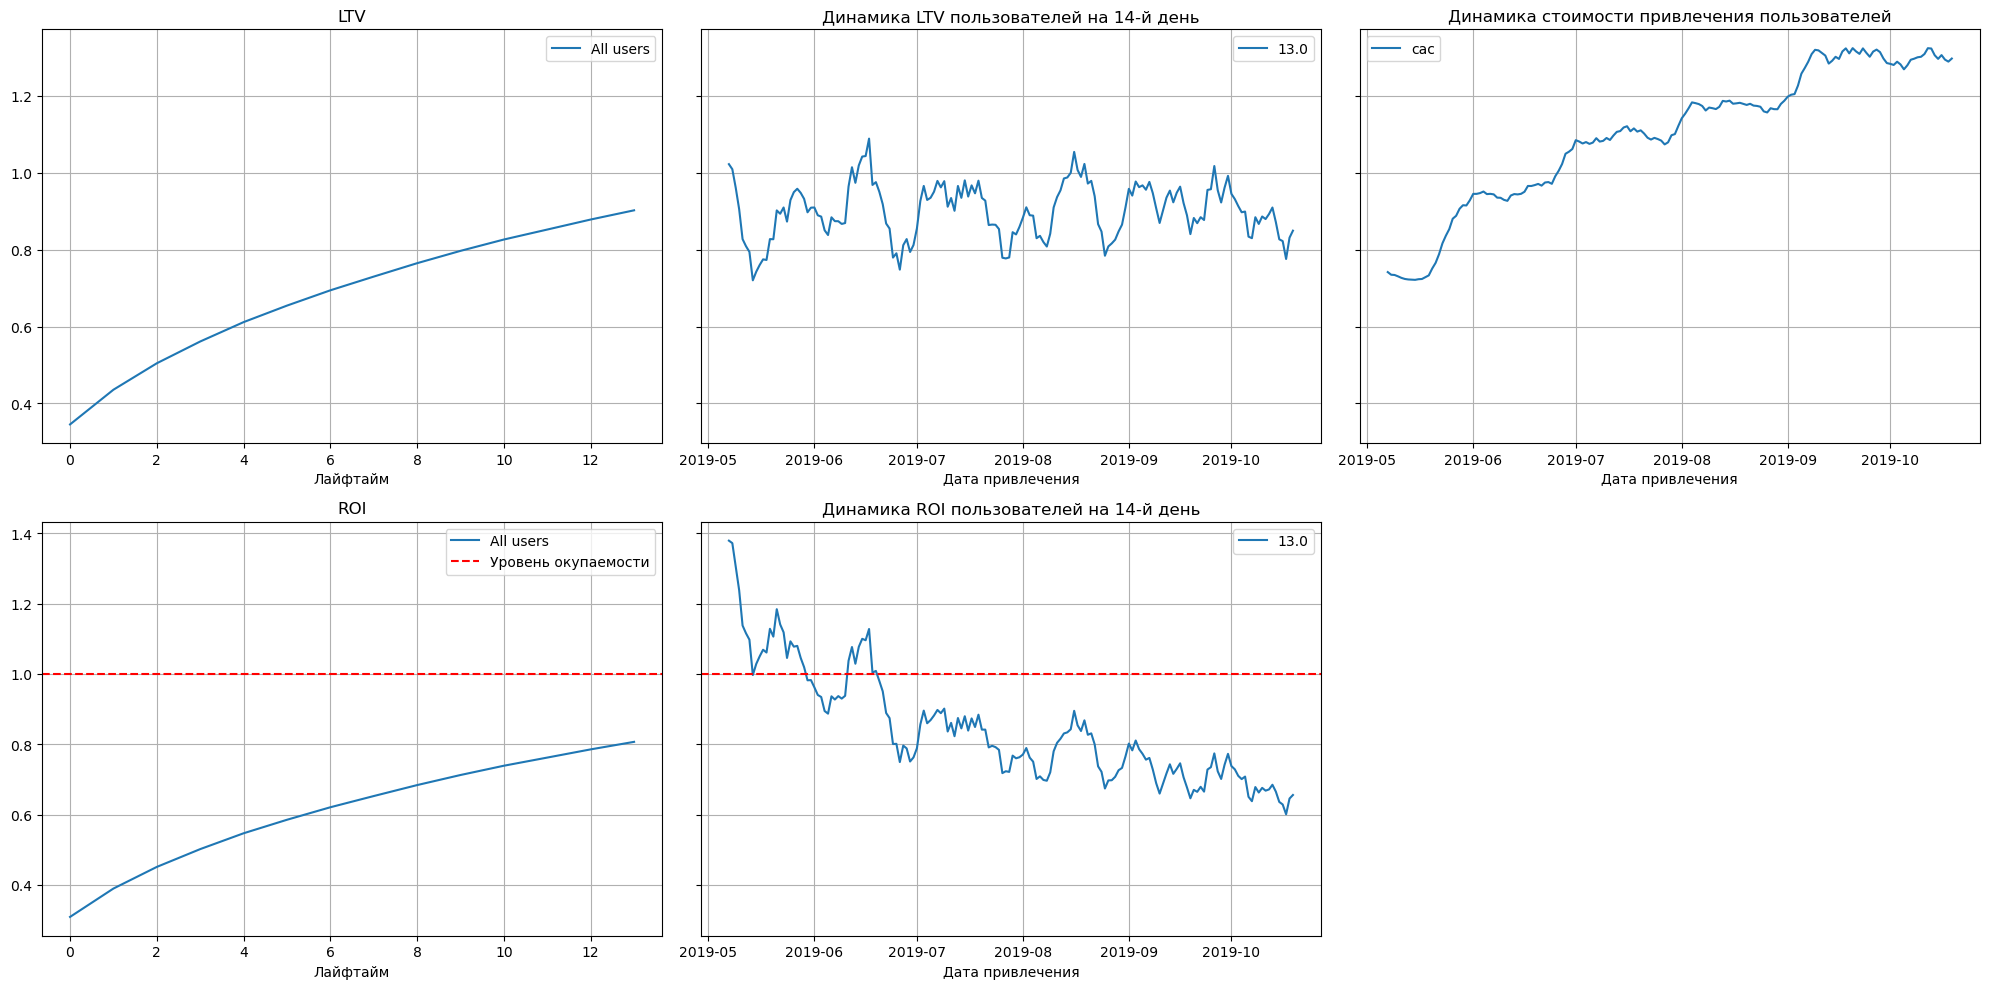

In [34]:
#считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

#построим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Судя по графикам:
* в конце второй недели ROI составляет чуть больше 80%, реклама не окупается;
* LTV стабильно растет, как и САС;
* динамика окупаемости инвестиций постепенно падает.

Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

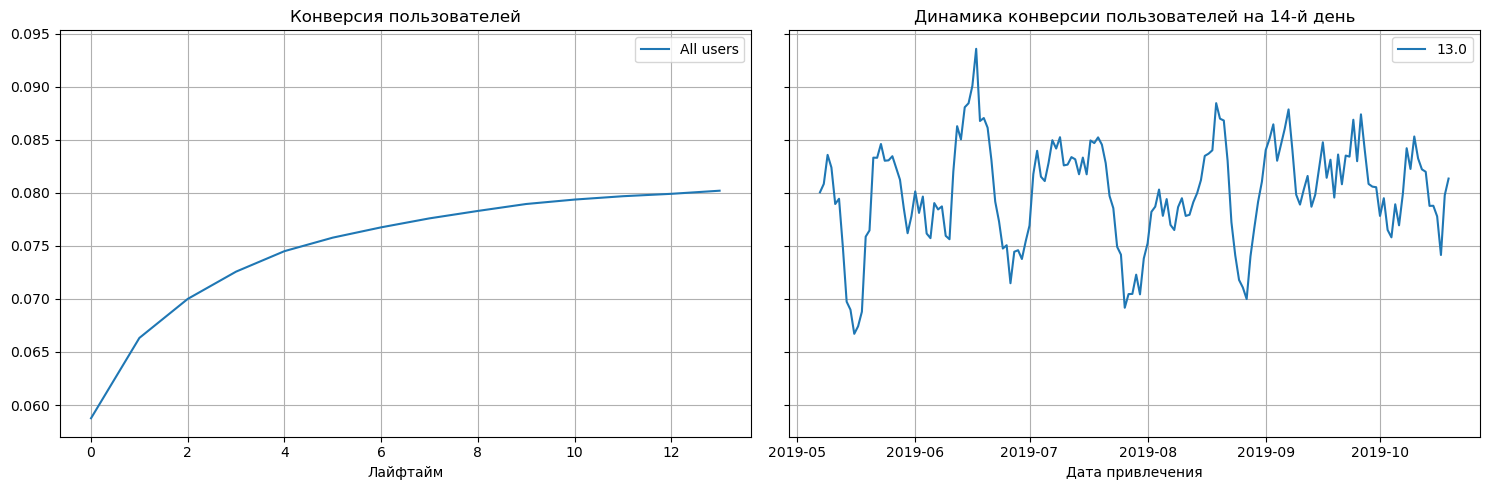

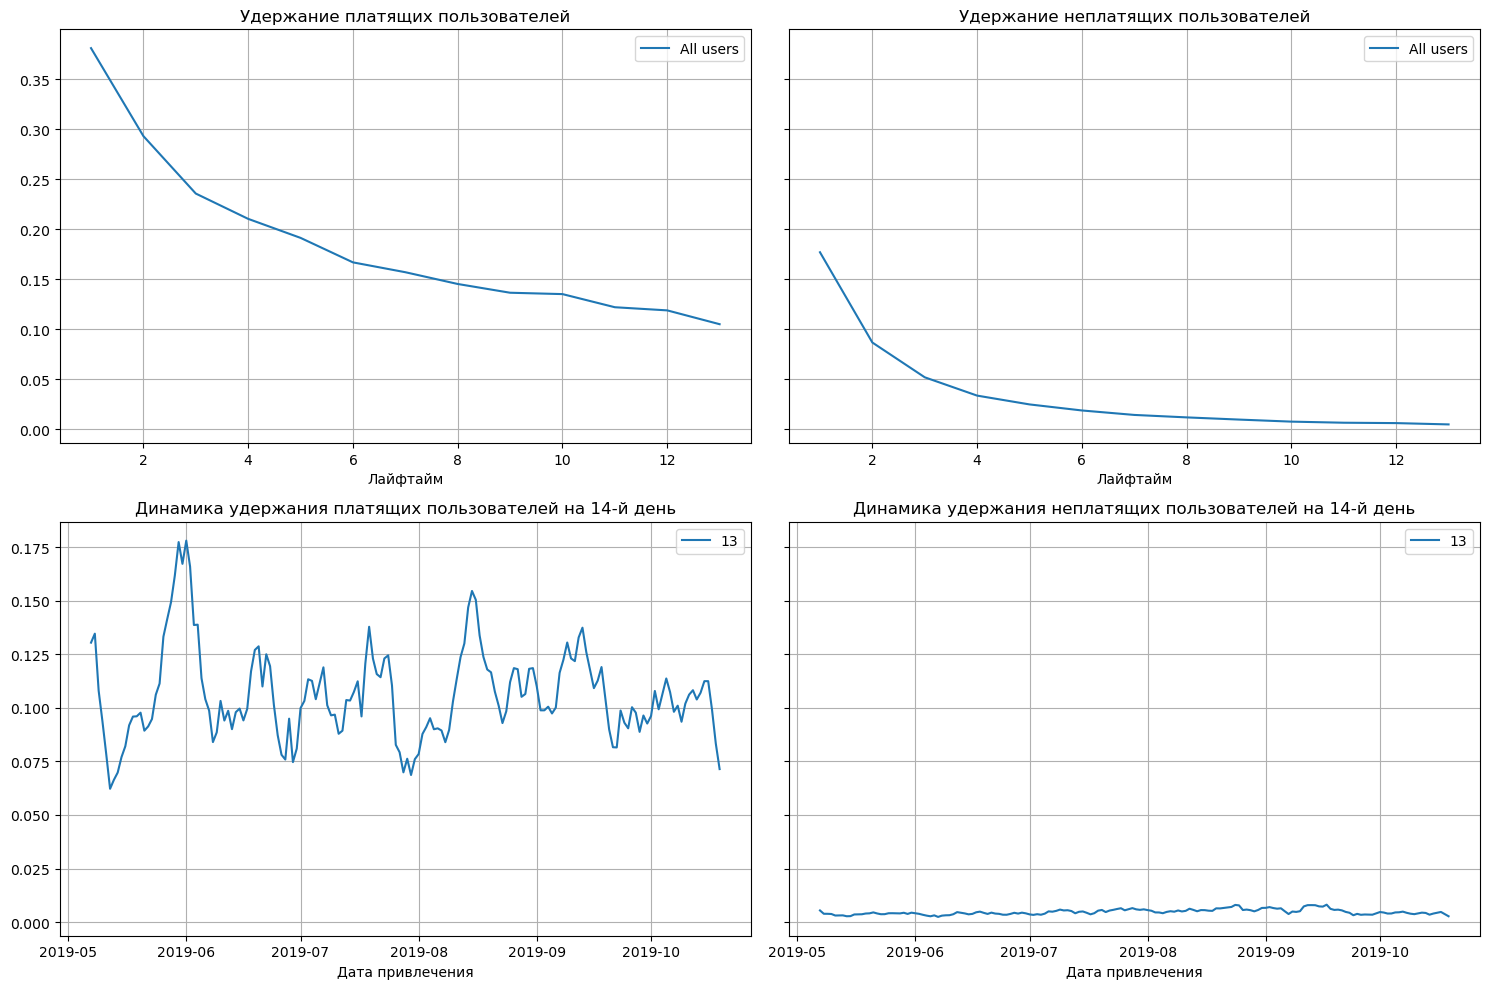

In [35]:
#считаем конверсию
conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days)

#строим график конверсии и динамики ее изменения
plot_conversion(conversion, conversion_history, horizon_days)
plt.show()


#считаем удержание
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days)

#строим график удержания и динамики его изменения
plot_retention(retention_grouped, retention_history, horizon_days)
plt.show()

Исходя из графиков:
* конверсия очень низкая, около 8%;
* удержание неплатящих убывает быстрее, чем удержание платящих.

По полученным графикам сложно выявить причину убытков компании. Необходимо пройтись по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

Проверим конверсию пользователей и динамику её изменения с разбивкой по каналам, странам, устройствам. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

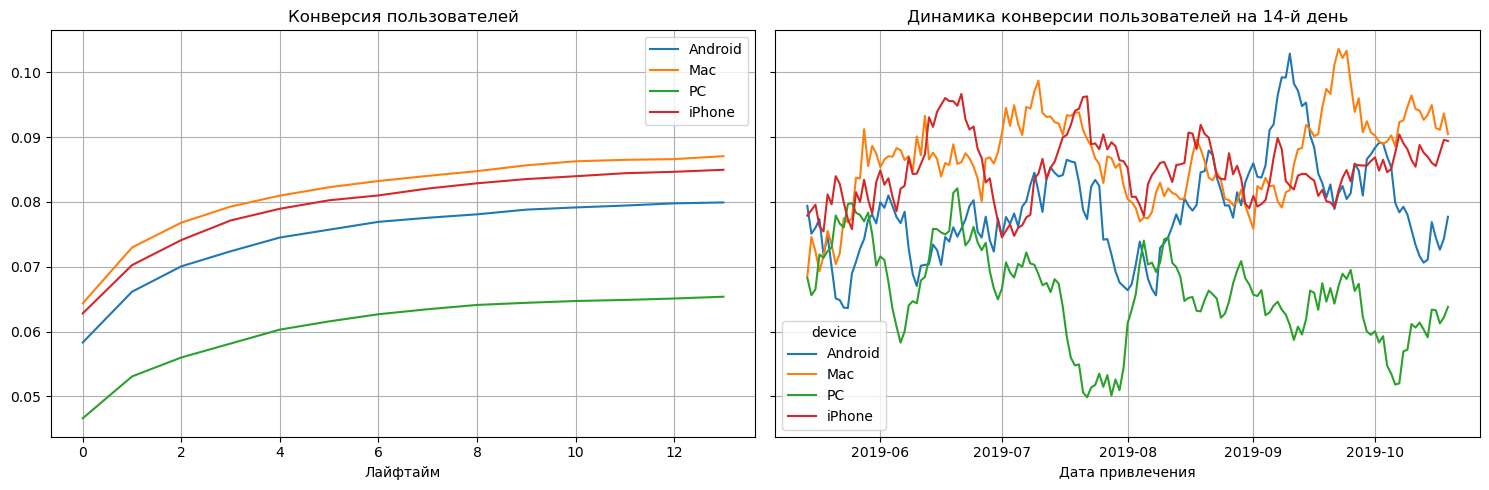

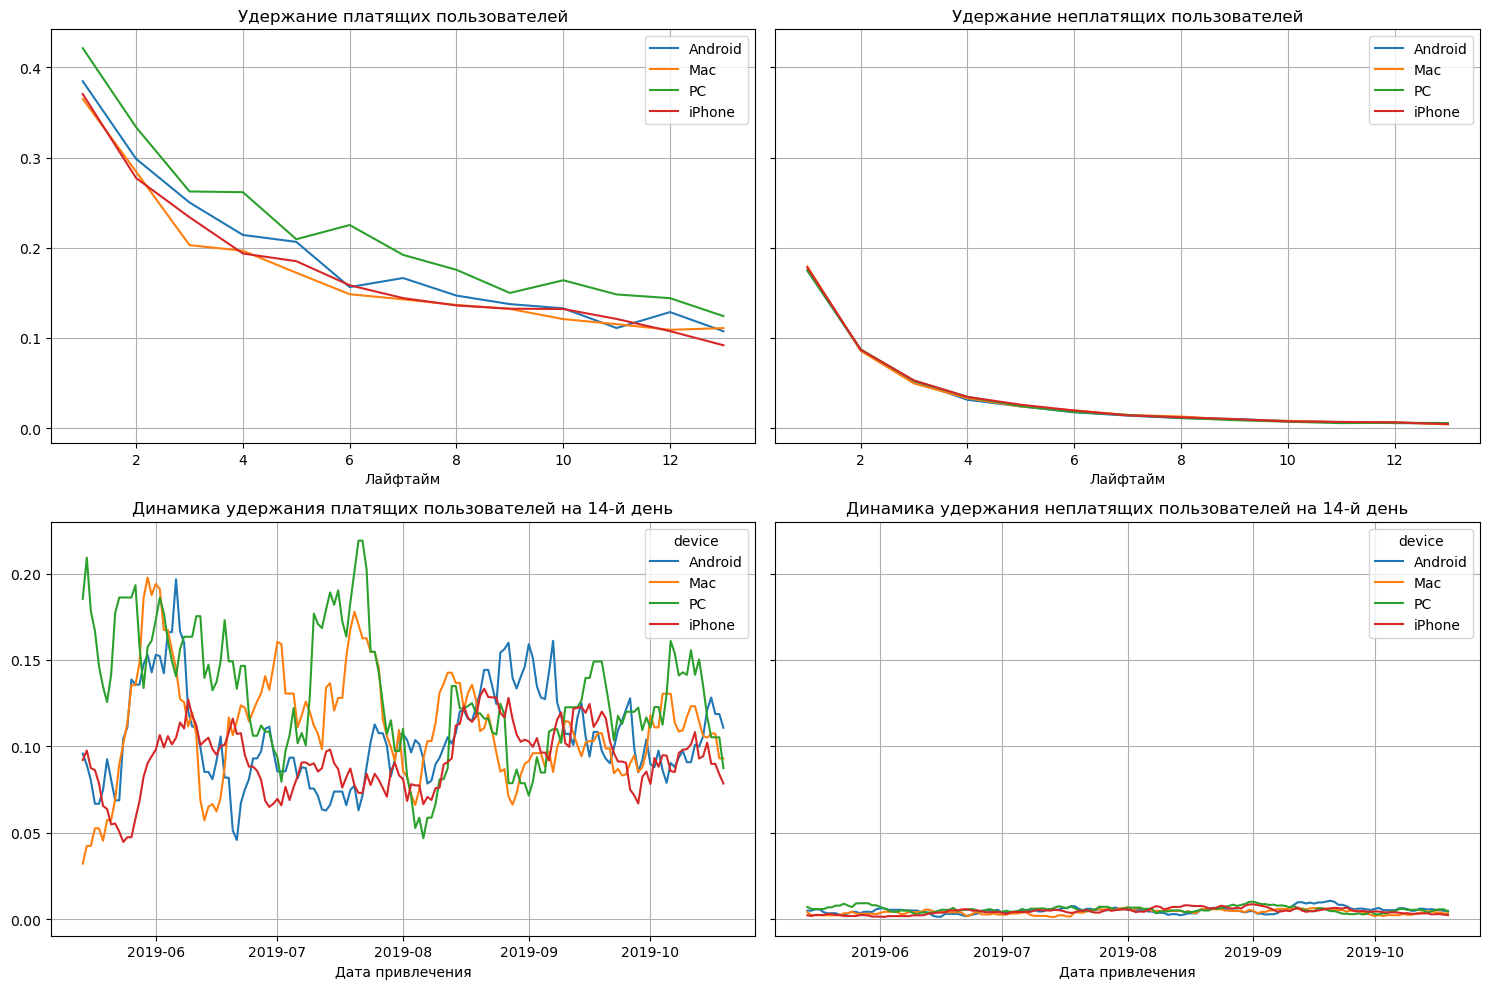

In [36]:
#сделаем разбивку по девайсам
dimensions = ['device']

#считаем конверсию
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

#строим график конверсии и динамики ее изменения
plot_conversion(conversion, conversion_history, horizon_days, window=14)
plt.show()


#считаем удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

#строим график удержания и динамики его изменения
plot_retention(retention_grouped, retention_history, horizon_days, window=14)
plt.show()

Самая низкая конверсия среди пользователей компьютеров, график динамики показал, что к концу августа она очень сильно упала. Самая высокая - у пользователей Mac и iPhone. Удержание платящих пользователей не стабильное, в особенности пользователей PC.

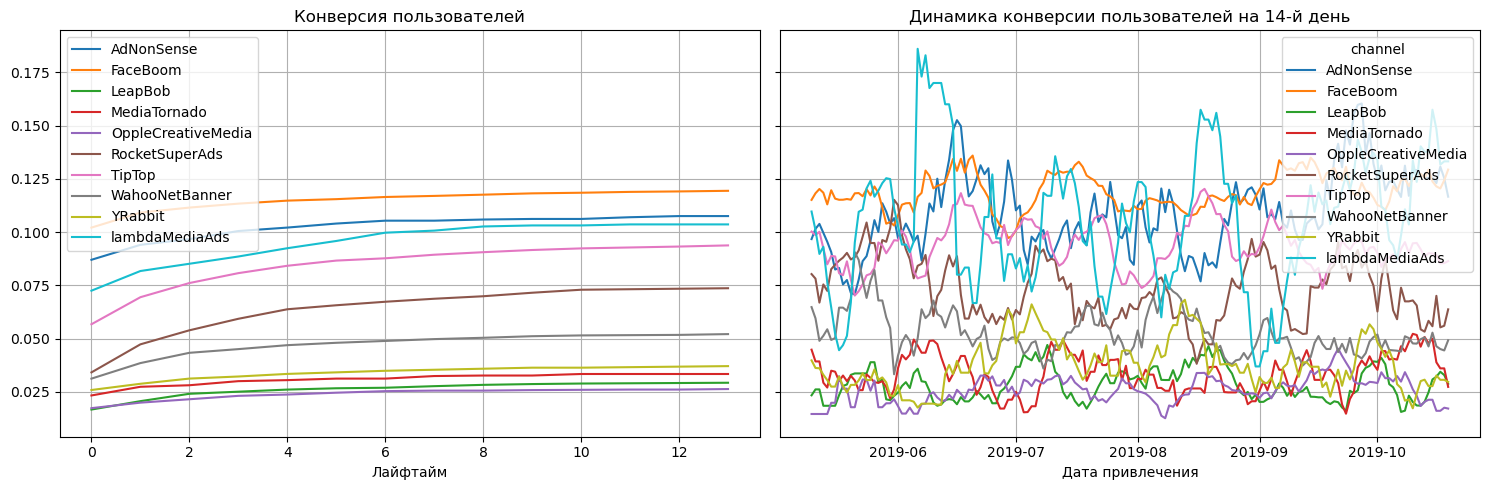

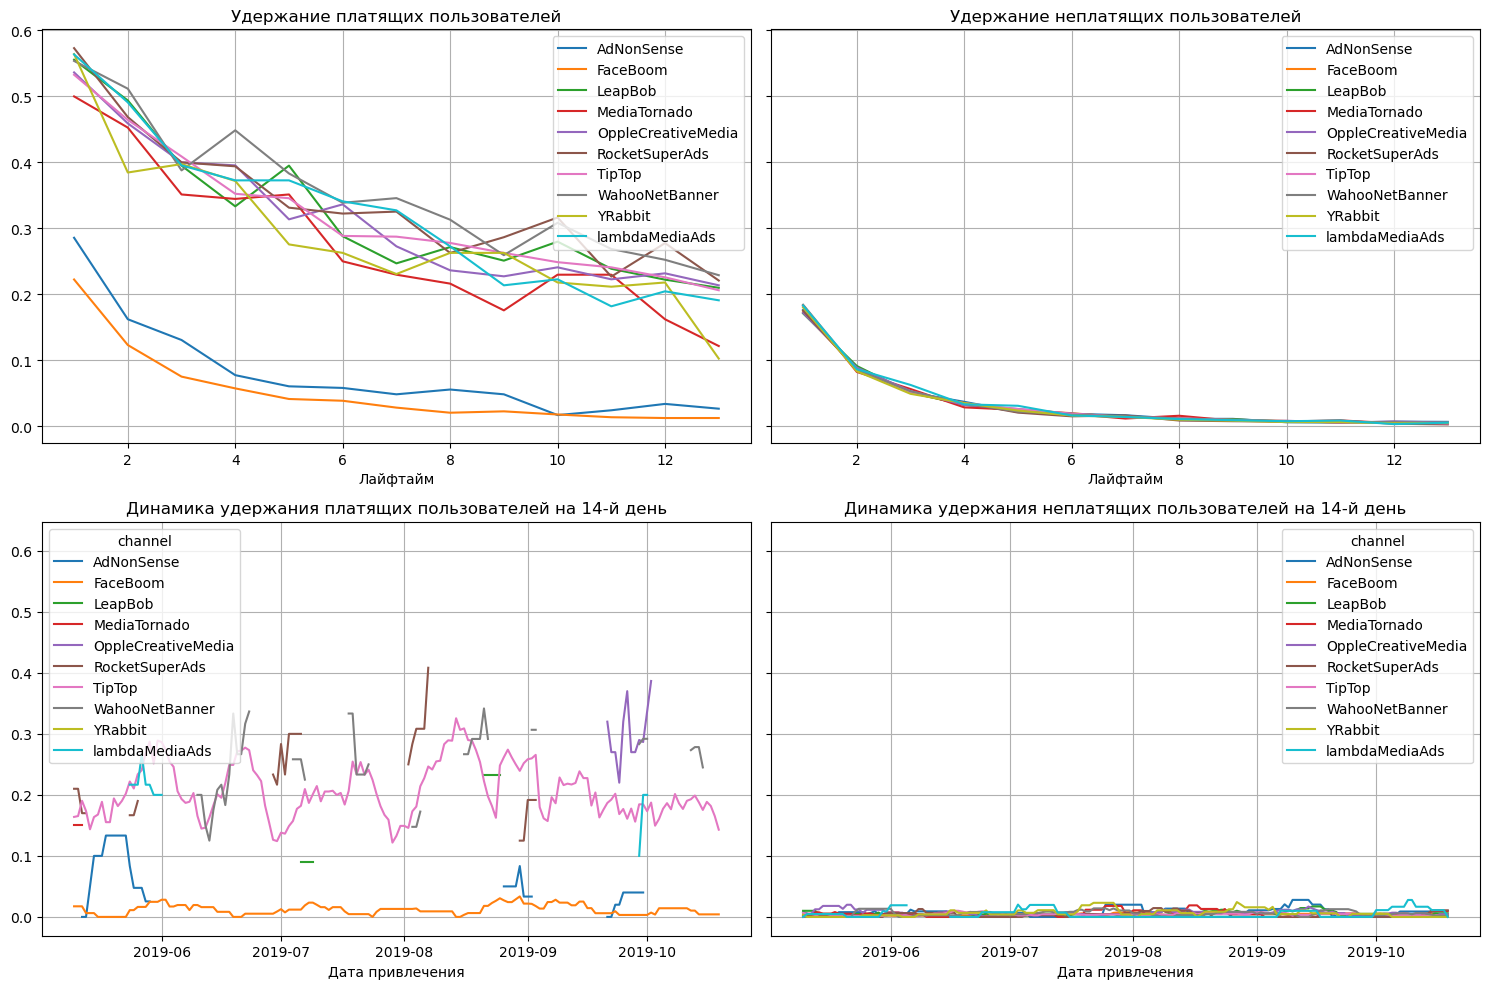

In [37]:
#сделаем разбивку по каналам
dimensions = ['channel']

#считаем конверсию
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

#строим график конверсии и динамики ее изменения
plot_conversion(conversion, conversion_history, horizon_days, window=10)
plt.show()


#считаем удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

#строим график удержания и динамики его изменения
plot_retention(retention_grouped, retention_history, horizon_days, window=10)
plt.show()

На основе графиков можно сказать, что:
* Самая высокая конверсия оказалась по каналам FaceBoom, AdNonSense и lambdaMediaAds. Самая низкая же конверсия - у каналов OppleCreativeMedia, LeapBob, MediaTornado и YRabbit;
* удержание платящих хуже по каналам FaceBoom и AdNonSense;

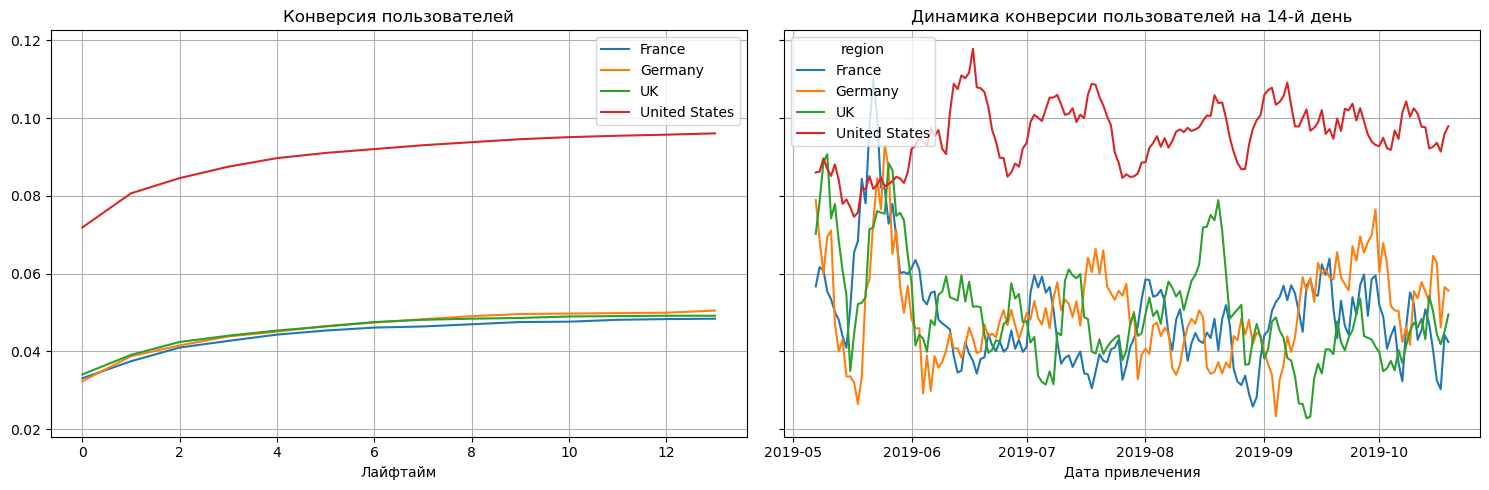

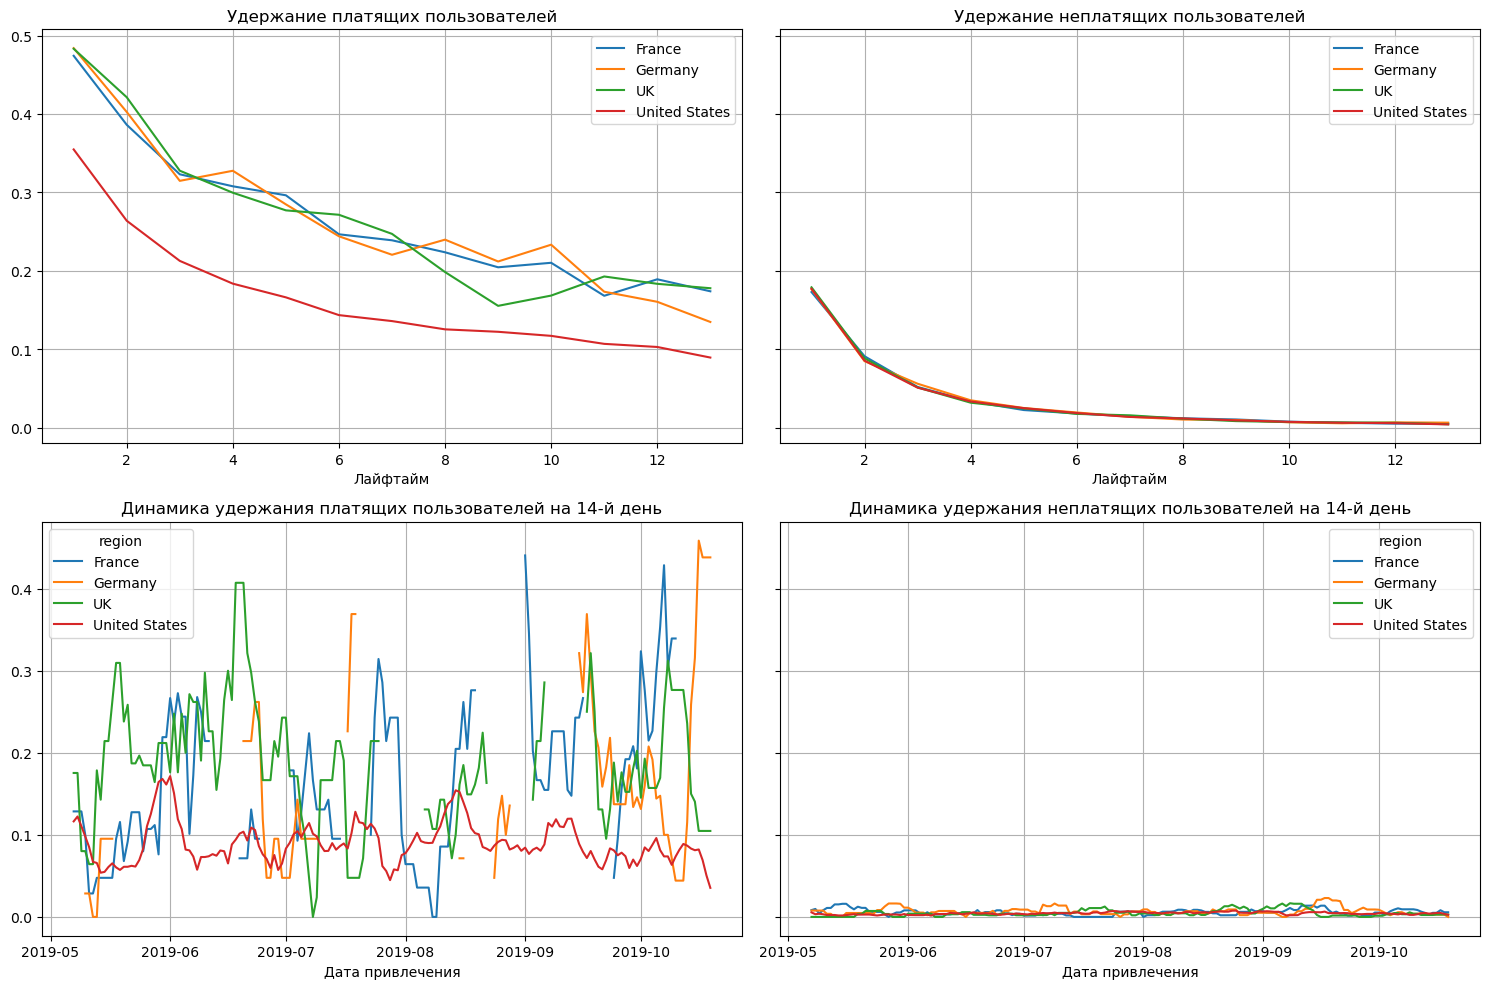

In [38]:
#сделаем разбивку по каналам
dimensions = ['region']

#считаем конверсию
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

#строим график конверсии и динамики ее изменения
plot_conversion(conversion, conversion_history, horizon_days)
plt.show()


#считаем удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

#строим график удержания и динамики его изменения
plot_retention(retention_grouped, retention_history, horizon_days)
plt.show()

При разбивке пользователей по странам видно, что коэффициент конверсии выше всего по пользователям из США. При этом удержание пользователей США ниже, чем удержание пользователей других стран. Явных лидеров на графике удержания пользователей нет.

Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

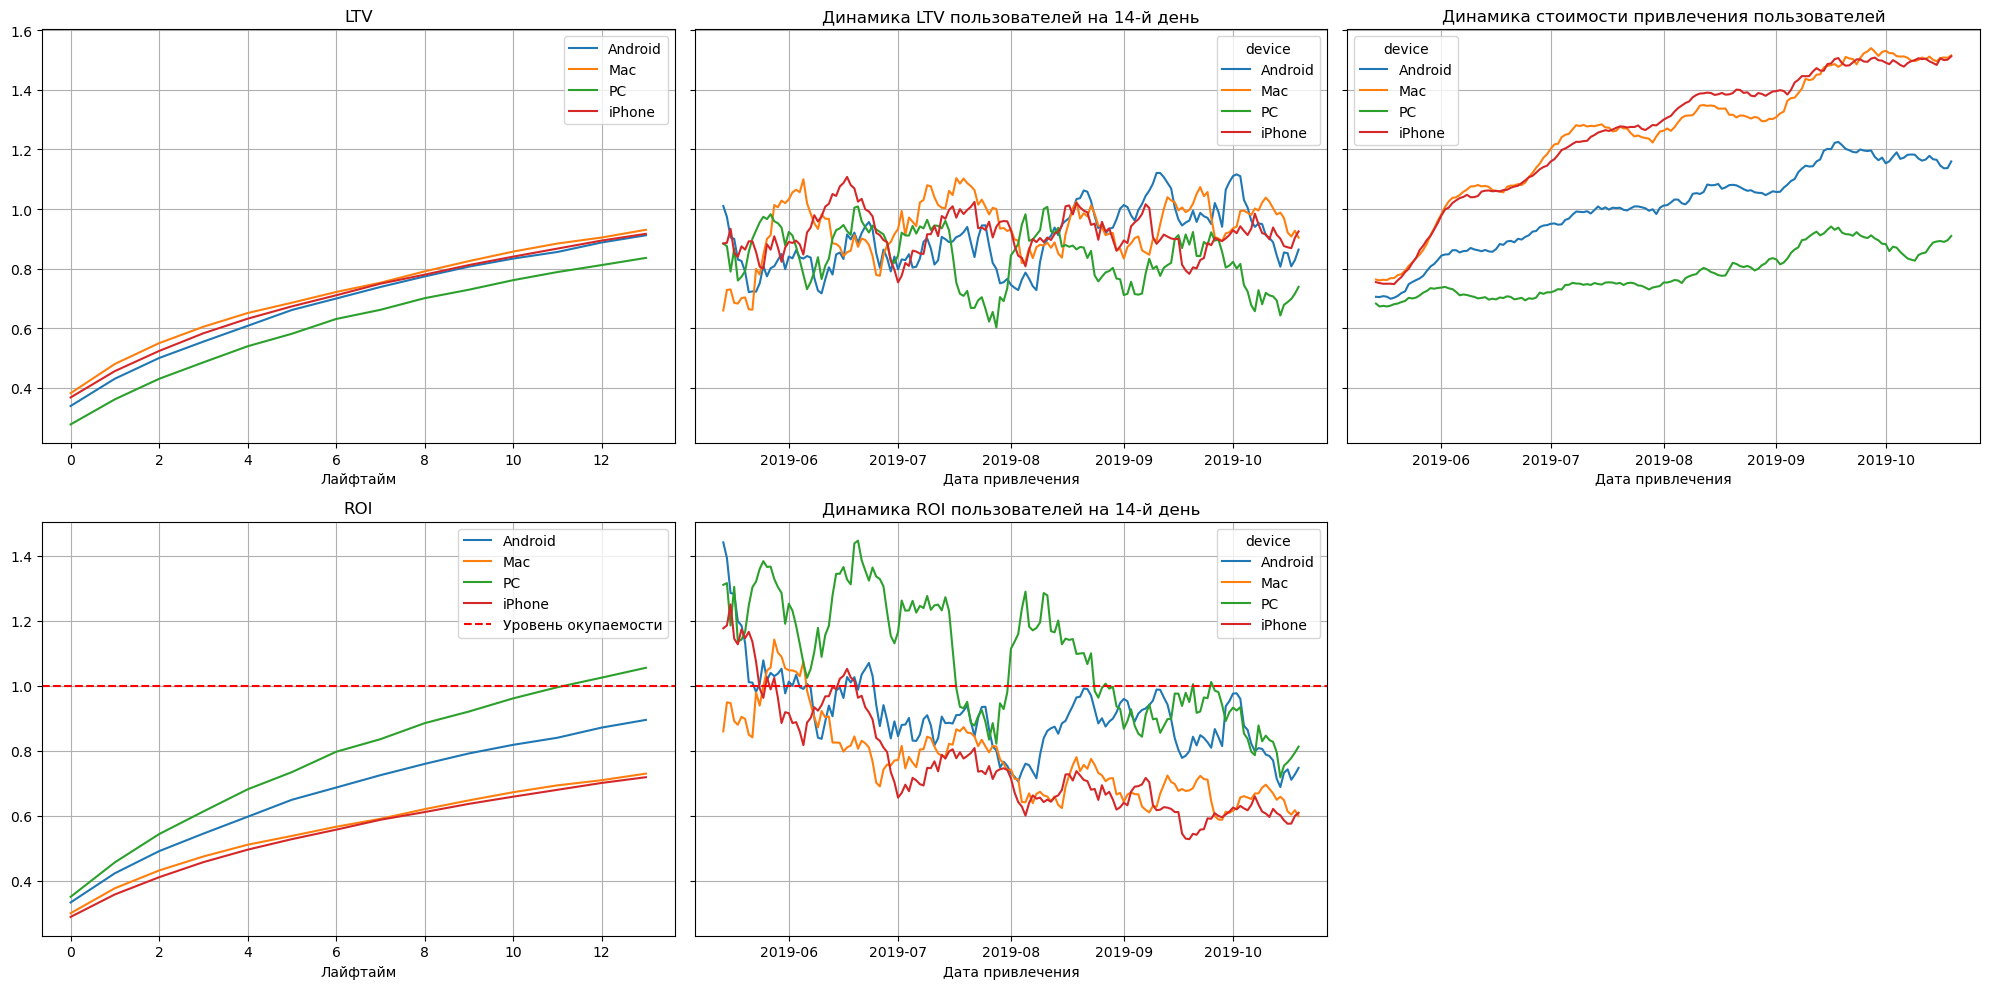

In [39]:
#считаем LTV и ROI с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

По графикам видно:
* реклама окупается только для пользователей PC, больше всего она не окупается для пользователей iPhone и Mac. Судя по графику динамики ROI, окупаемость постепенно падает для пользователей всех девайсов;
* стоимость привлечения пользователей всех девайсов растет. Дороже всего выходит привлечение пользователей iPhone и Mac;
* LTV стабильно растет для всех пользователей, самое наименьшее значение LTV вышло по пользователям PC.


Теперь проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

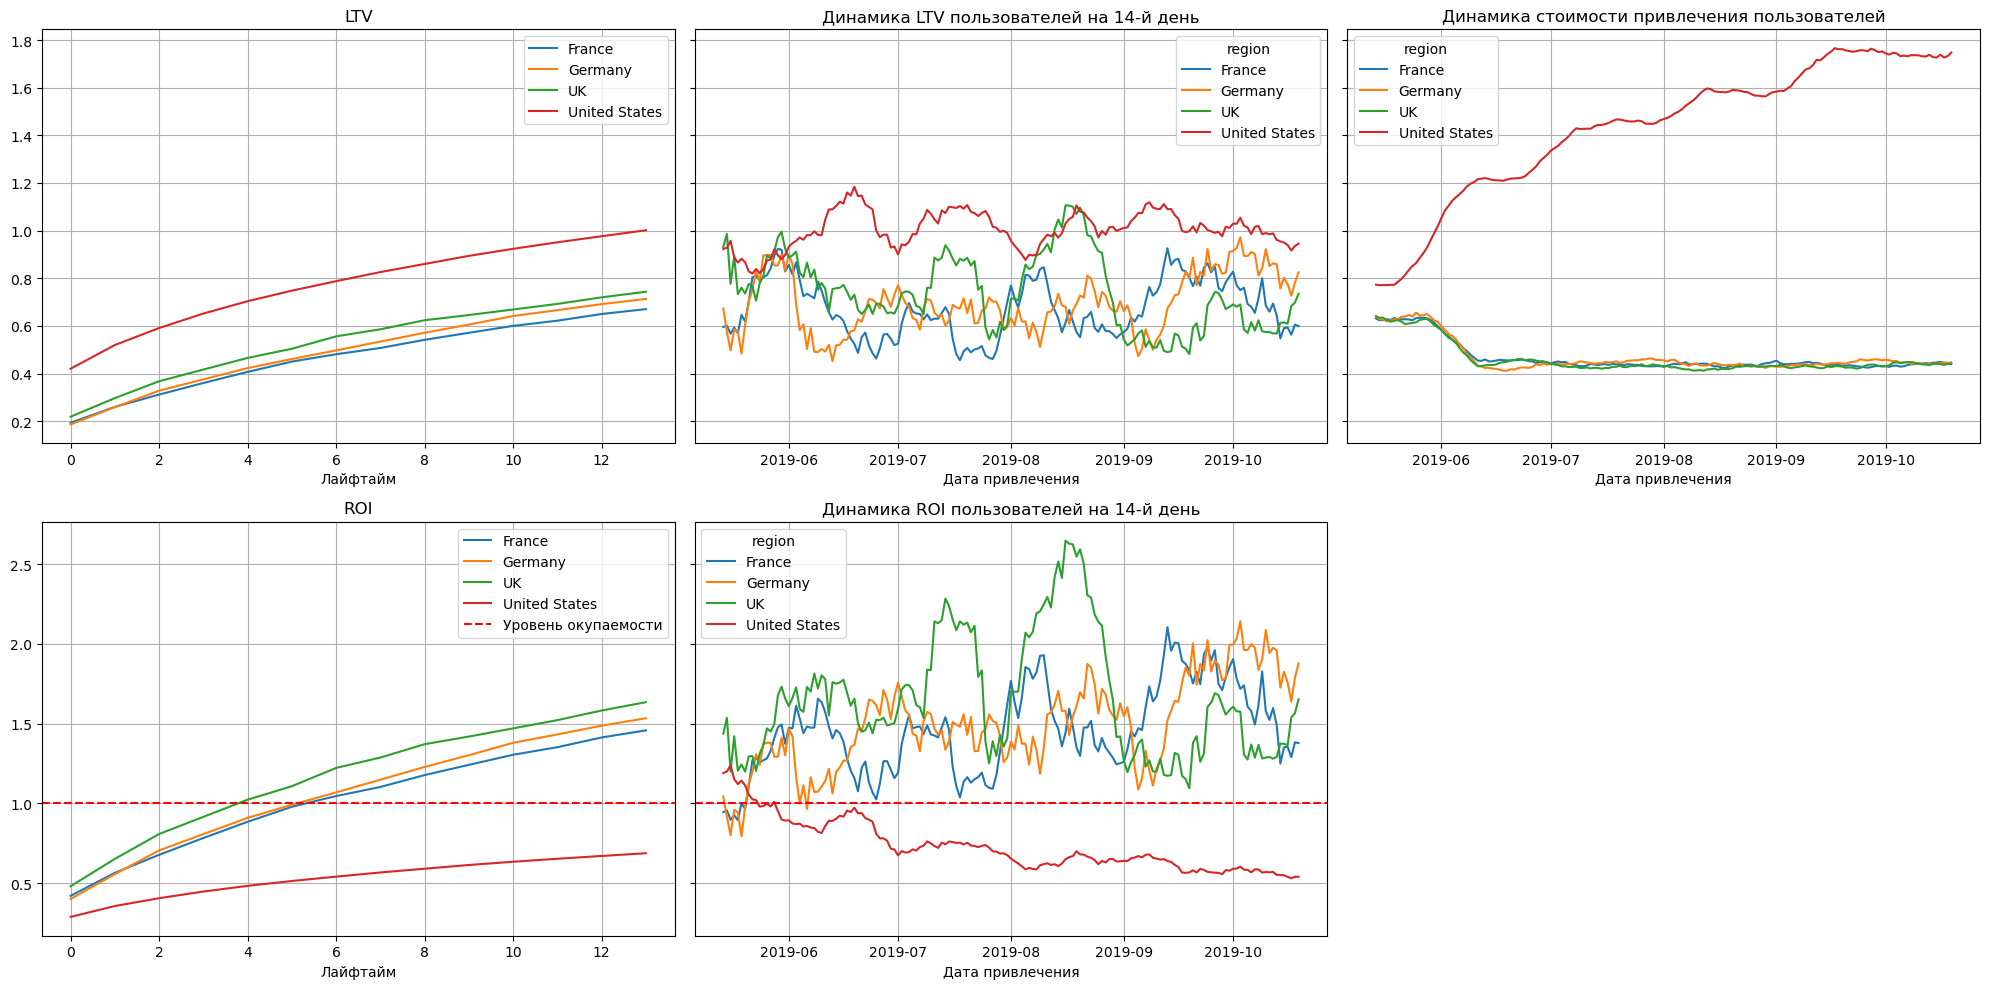

In [40]:
#считаем LTV и ROI с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

На основе графиков можно сделать вывод, что:

* реклама не окупается только для пользователей США, это подтверждает и график динамики ROI (для пользователей из США показатели только падают);
* LTV стабильно растет, особенно большая прибыль приходит от пользователей США;
* стоимость привлечения пользователей растет только для пользователей США. Для пользователей остальных стран CAC упал и после падения стал стабилен.

Осталось проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построим также графики LTV и ROI, и графики динамики LTV, CAC и ROI.

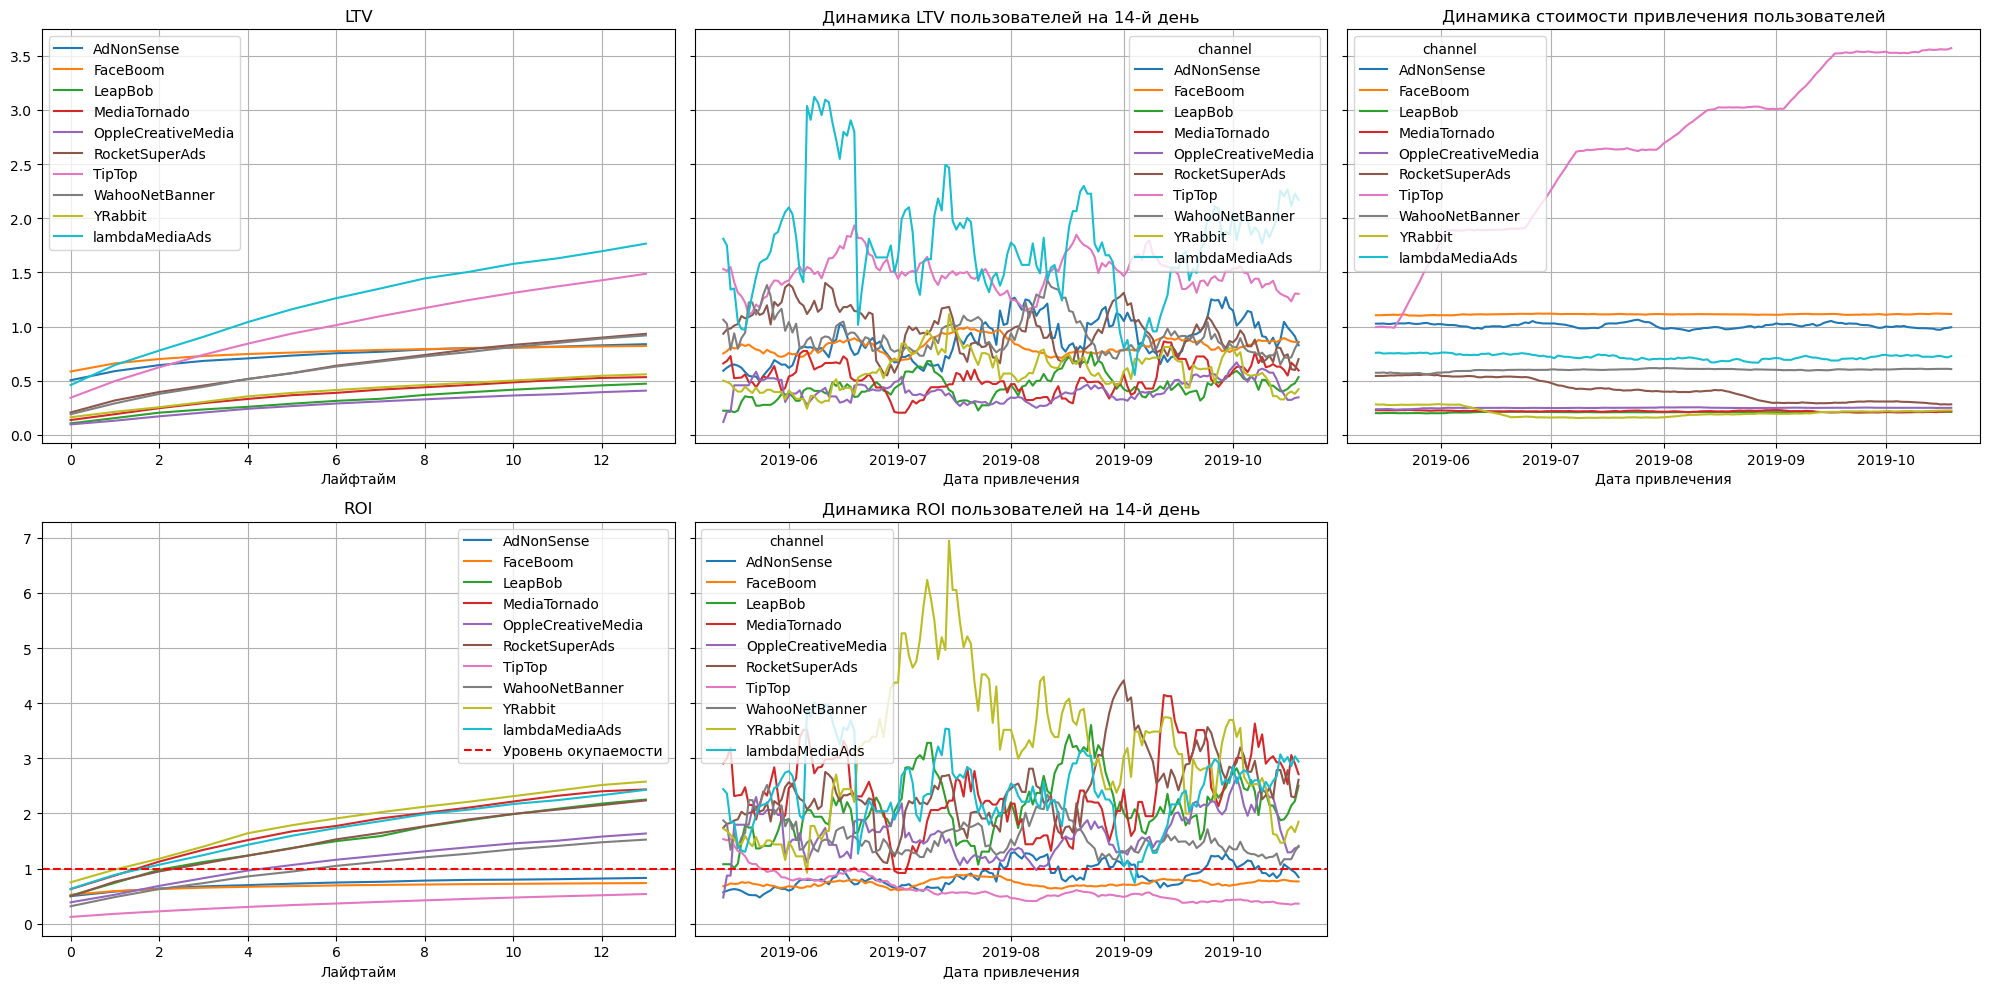

In [41]:
#считаем LTV и ROI с разбивкой по рекламным каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)


На основе графиков, можно сделать следующие выводы:
* реклама окупается не везде. Инвестиции не окупаются по каналам TipTop, FaceBoom и AdNonSense;
* стоимость привлечения пользователей стабильна по всем каналам, кроме TipTop (по этому каналу она только растет);
* LTV стабильно растет по всем каналам. Есть явные лидеры: TipTop и lambdaMediaAds.

### Общий вывод

В рамках этого исследования были проанализированы данные о расходах на маркетинг и доходах приложения Procrastinate Pro+, собранные в период с 1 мая по 27 октября 2019 года.

**Цель исследования** состояла в выявлении причин убытков компании.

#### **Этап 1. Изучение и предварительная обработка данных**

На этапе предобработки были произведены:
* приведение названий столбцов к нужному виду; 
* изменение типа данных там, где это было необходимо; 
* проверка данных на пропуски и дубликаты. 

Все столбцы  3-х датафреймов были приведены к нижнему, змеиному регистру. Тип данных в `session_start`, `session_end`, `event_dt`, `dt` был изменен. Пропусков и дубликатов в данных обнаружено не было.

#### **Этап 2. Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии**

На данном этапе были заданы функции для вычисления значений метрик:

`get_profiles()` — для создания профилей пользователей,

`get_retention()` — для подсчёта Retention Rate,

`get_conversion()` — для подсчёта конверсии,

`get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

`filter_data()` — для сглаживания данных,

`plot_retention()` — для построения графика Retention Rate,

`plot_conversion()` — для построения графика конверсии,

`plot_ltv_roi` — для визуализации LTV и ROI.


#### **Этап 3. Исследовательсий анализ данных**

На третьем этапе были созданы пользовательские профили. В задании проекта указано, что есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года, однако в ходе дополнительной проверки было обнаружено для корректного анализа понадобятся данные о пользователях, привлеченных с 1 мая 2019 года по 19 октрября 2019 года.

В качестве момента анализа была задана дата: 1 ноября 2019 года.

Горизонт анализа составил 14 дней.

В ходе анализа, было обнаружено, что в приложение приходят пользователи из Франции, Германии, Великобритании и США. Больше всего платящих пользователей приходится на США (7%). На втором месте стоит Германия (4%), на третьем - Великобритания (3.9%), на последнем - Франция (3.8%).

Клиенты приложения пользуются Android, Mac, PC и iPhone. Предпочтения пользователей в девайсах:

1. Mac (6.3%).

2. iPhone (6.2%)

3. Android (5.8%).

4. PC (5%).

Больше всего платящих пользователей пришло из FaceBoom (12%). На втором месте стоит AdNonSense, а на третьем lambdaMediaAds. Наоборот, меньше всего пользователей пришло по каналу LeapBob, OppleCreativeMedia и органическому трафику (2%).

#### **Этап 4. Оценка расходов на маркетинг**

Общая сумма расходов на маркетинг составила 105497.3 ед.

Больше всего было вложено в рекламу на канале TipTop (54751 ед.), хотя предыдущие расчеты показали, что по кол-ву пришедших в итоге платящих пользователей этот источник стоит на четвертом месте. На втором месте по расходам стоит канал FaceBoom. Минимальные расходы были на маркетинг на MediaTornado и YRabbit.

Самые большие расходы на маркетинг ***по неделям и месяцам*** приходятся на каналы FaceBoom и TipTop. Помимо FaceBoom и TipTop можно выделить еще 2 самых дорогостоящих канала привлечения: WahooNetBanner и AdNonSense.

Топ-3 самых больших затрат на привлечение 1 пользователя из источников:

1. TipTop (2.76 ед.);

2. FaceBoom (1.11 ед.);

3. AdNonSense (1.01 ед.).

Самыми малозатратными каналами оказались: MediaTornado, YRabbit, LeapBob.

#### **Этап 5. Оценка окупаемости рекламы**

В целом ROI составляет чуть больше 80%, т.е. реклама не окупается. LTV стабильно растет, как и стоимость привлечения 1 пользователя. Динамика окупаемости инвестиций постепенно падает.

Конверсия очень низкая, около 8%.
По полученным графикам было сложно выявить причину убытков компании, поэтому было принято решение пройтись по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

В разбивке пользователей по *девайсам*:
* Расчет конверсии и удержания показал, что самая низкая конверсия оказалась среди пользователей компьютеров. График динамики показал, что к концу августа она очень сильно упала. Самая высокая конверсия у пользователей Mac и iPhone. Удержание платящих пользователей не стабильное, в особенности пользователей PC.
* Реклама окупается только для пользователей PC, больше всего она не окупается для пользователей iPhone и Mac. Судя по графику динамики ROI, окупаемость постепенно падает для пользователей всех девайсов. В то же время стоимость привлечения пользователей всех девайсов растет. Дороже всего выходит привлечение пользователей iPhone и Mac. Также можно отметить, что LTV стабильно растет для всех пользователей, самое наименьшее значение LTV вышло по пользователям PC.

В разбивке пользователей по *каналам*:
* Расчет конверсии и удержания показал, что самая высокая конверсия оказалась по каналам FaceBoom, AdNonSense и lambdaMediaAds. Самая низкая же конверсия - у каналов OppleCreativeMedia, LeapBob, MediaTornado и YRabbit. Удержание платящих хуже по каналам FaceBoom и AdNonSense.
* Реклама окупается не везде. Инвестиции не окупаются по каналам TipTop, FaceBoom и AdNonSense. Стоимость привлечения пользователей стабильна по всем каналам, кроме TipTop (по этому каналу она только растет). LTV стабильно растет по всем каналам. Есть явные лидеры: TipTop и lambdaMediaAds.

В разбивке пользователей по *странам*:
* Расчет конверсии и удержания показал, что коэффициент конверсии выше всего по пользователям из США. При этом удержание пользователей США ниже, чем удержание пользователей других стран. Явных лидеров на графике удержания пользователей нет.
* Реклама не окупается только для пользователей США, это подтверждает и график динамики ROI (для пользователей из США показатели только падают). LTV стабильно растет, особенно большая прибыль приходит от пользователей США. Стоимость привлечения пользователей растет только для пользователей США. Для пользователей остальных стран CAC упал в период, приходящийся на конец мая - начало июня, и после падения стал стабилен.


**Таким образом, можно сделать следующие выводы:**

1. Если смотреть на картину в целом, реклама, направленная на привлечение пользователей, не окупается.

2. Негативное влияние на окупаемость рекламы оказывает использование приложения с таких устройств, как iPhone и Mac. Несмотря на высокую конверсию и растущие вложения для привлечения пользователей данных девайсов, окупаемость этой категории пользователей так и не может произойти. Более того, реклама не окупается для пользователей из США, даже с учетом высокой конверсии и крупных вложений в их привлечение. Также можно сказать, что инвестиции в рекламу на каналах FaceBoom и AdNonSense не окупаются, хотя вложения в эти каналы значительно превышают вложения в другие каналы привлечения (по расходам они занимают 2-е и 4-е место, соответственно).

3. По всей видимости, убытки связаны с крайне большими вложениями в такие каналы, как FaceBoom и AdNonSense, а также в привлечение клиентов из США. Есть также предположение, что проблема окупаемости инвестиций, вложенных в привлечение пользователей iPhone и Mac, может быть связана с техническими неполадками самого приложения. Например, пользователи iPhone и Mac сталкиваются с тех. ошибкой на этапе оплаты заказа и пр.

В качестве рекомендаций можно предложить для начала сократить вложения в рекламу на каналах FaceBoom и AdNonSense, а также сократить расходы на привлечение пользователей из США. Как вариант, можно было бы вложиться скорее в те каналы или тех пользователей стран, у которых уже обнаружены высокие конверсии и хорошая окупаемость инвестиций. Помимо этого, было бы уместно проверить, имеются ли какие-то технические неполадки в приложении для пользователей iPhone и Mac, и если да, то в дальнейшем их устранить.
